# 공공보건의료기관 데이터 분석

## 공공보건의료기관 현황분석

In [ ]:
import pandas as pd
import numpy as np

data=pd.read_csv('../Data/공공보건의료기관현황.csv',index_col=0,encoding='euc_kr')
print(data.columns)
data.head()

In [ ]:
# 주소에서 시도, 군구 정보 분리
addr=pd.DataFrame(data['주소'])

# 시도, 군구 분리(공백기준)
addr = addr['주소'].apply(lambda v : v.split()[:2])

# DataFrame 생성
addr=pd.DataFrame(addr.tolist(),columns=('시도','군구'))
addr

In [ ]:
# ['시도'] 컬럼에서 고유한 값 찾기
print(addr['시도'].unique())

In [24]:
# ‘창원시’ 주소 데이터 변경
addr[addr['시도'] == '창원시']

,시도,군구
27,창원시,의창구
31,창원시,마산합포구3.15대로


In [25]:
addr.iloc[27] = ['경상남도', '창원시']
addr.iloc[31] = ['경상남도', '창원시']
addr.iloc[27]

시도    경상남도
군구     창원시
Name: 27, dtype: object

In [26]:
# ‘경산시’, ‘천안시’ 주소 데이터 변경
addr[addr['시도'] == '경산시']

,시도,군구
47,경산시,경안로


In [27]:
addr.iloc[47] = ['경상북도', '경산시']
addr.iloc[47]

시도    경상북도
군구     경산시
Name: 47, dtype: object

In [28]:
addr[addr['시도'] == '천안시']

,시도,군구
209,천안시,동남구
210,천안시,동남구


In [29]:
addr.iloc[209] = ['충청남도', '천안시']
addr.iloc[210] = ['충청남도', '천안시']
addr.iloc[209]

시도    충청남도
군구     천안시
Name: 209, dtype: object

##### dict.keys() : keys만 반환
##### dict.values() : values만 반환
##### dict.items() : Key, Value 쌍 얻기
##### dict.get(key[,default]) : key로 value 얻기, key없을시 디폴트값 반환

In [30]:
# 시도 이름을 표준이름으로 변경
# 표준 행정구역 이름으로 수정 : 경기 -> 경기도, 경남 -> 경상남도, ...
addr_aliases = {'경기':'경기도', '경남':'경상남도', '경북':'경상북도', '충북':'충청북도', '서울시':'서울특별시', '부산특별시':'부산광역시', '대전시':'대전광역시', '충남':'충청남도', '전남':'전라남도', '전북':'전라북도'}

# dict.get(key[,default])
# key에 해당하는 값이 없으면 default값을 리턴
addr['시도']=addr['시도'].apply(lambda v: addr_aliases.get(v, v))
                    # key:경기->value:경기도, key(x):경기도->default:경기도

print(addr['시도'].unique())


['강원도' '경기도' '경상남도' '경상북도' '인천광역시' '대구광역시' '전라남도' '대전광역시' '광주광역시'
 '제주특별자치도' '부산광역시' '전라북도' '충청북도' '서울특별시' '충청남도' '울산광역시']


In [31]:
# 군구 이름 확인
print(addr['군구'].unique())

['춘천시' '삼척시' '영월군' '원주시' '강릉시' '속초시' '정선군' '수원시' '이천시' '안성시' '의정부시' '포천시'
 '파주시' '용인시' '평택시' '시흥시' '여주시' '남양주시' '동두천시' '안산시' '부천시' '통영시' '사천시' '창원시'
 '김해시' '양산시' '거창군' '남해군' '의령군' '포항시' '김천시' '안동시' '울진군' '경주시' '구미시' '영주시'
 '상주시' '문경시' '경산시' '의성군' '청도군' '고령군' '칠곡군' '봉화군' '울릉군' '부평구' '북구' '순천시'
 '대덕구' '태백시' '동해시' '화성시' '광산구' '남구' '중구' '아란13길' '서구' '전주시' '진주시' '청주시'
 '종로구' '성남시' '동구' '화순군' '강동구' '사상구' '달서구' '해운대구' '유성구' '가평군' '양주시' '고양시'
 '홍천군' '양구군' '청원군' '계룡시' '논산시' '함평군' '양평군' '수성구' '달성군' '연수구' '노원구' '기장군'
 '공주시' '강북구' '광진구' '나주시' '창녕군' '목포시' '고흥군' '연제구' '동매로' '서초구' '은평구' '중랑구'
 '강남구' '동작구' '동대문구' '양천구' '성동구' '송파구' '울주군' '계양구' '옹진군' '보성군' '광양시' '영광군'
 '무안군' '진도군' '강진군' '곡성군' '여수시' '신안군' '장성군' '완주군' '부안군' '정읍시' '남원시' '군산시'
 '고창군' '진안군' '제주시' '서귀포시' '천안시' '보령시' '서산시' '서천군' '홍성군' '제천시' '충주시' '영동군'
 '단양군']


In [32]:
# '아란13길' 데이터 변경
addr[addr['군구'] == '아란13길']

,시도,군구
75,제주특별자치도,아란13길


In [33]:
addr.iloc[75] = ['제주특별자치도', '제주시']
addr.iloc[75]

시도    제주특별자치도
군구        제주시
Name: 75, dtype: object

In [34]:
print(addr['군구'].unique())

['춘천시' '삼척시' '영월군' '원주시' '강릉시' '속초시' '정선군' '수원시' '이천시' '안성시' '의정부시' '포천시'
 '파주시' '용인시' '평택시' '시흥시' '여주시' '남양주시' '동두천시' '안산시' '부천시' '통영시' '사천시' '창원시'
 '김해시' '양산시' '거창군' '남해군' '의령군' '포항시' '김천시' '안동시' '울진군' '경주시' '구미시' '영주시'
 '상주시' '문경시' '경산시' '의성군' '청도군' '고령군' '칠곡군' '봉화군' '울릉군' '부평구' '북구' '순천시'
 '대덕구' '태백시' '동해시' '화성시' '광산구' '남구' '중구' '제주시' '서구' '전주시' '진주시' '청주시'
 '종로구' '성남시' '동구' '화순군' '강동구' '사상구' '달서구' '해운대구' '유성구' '가평군' '양주시' '고양시'
 '홍천군' '양구군' '청원군' '계룡시' '논산시' '함평군' '양평군' '수성구' '달성군' '연수구' '노원구' '기장군'
 '공주시' '강북구' '광진구' '나주시' '창녕군' '목포시' '고흥군' '연제구' '동매로' '서초구' '은평구' '중랑구'
 '강남구' '동작구' '동대문구' '양천구' '성동구' '송파구' '울주군' '계양구' '옹진군' '보성군' '광양시' '영광군'
 '무안군' '진도군' '강진군' '곡성군' '여수시' '신안군' '장성군' '완주군' '부안군' '정읍시' '남원시' '군산시'
 '고창군' '진안군' '서귀포시' '천안시' '보령시' '서산시' '서천군' '홍성군' '제천시' '충주시' '영동군' '단양군']


In [35]:
# ‘시도’와 ‘군구’ 컬럼을 합친 새로운 컬럼 추가
addr['시도군구']=addr.apply(lambda r: r['시도'] + ' ' + r['군구'], axis=1)
addr.head()

,시도,군구,시도군구
0,강원도,춘천시,강원도 춘천시
1,강원도,삼척시,강원도 삼척시
2,강원도,영월군,강원도 영월군
3,강원도,원주시,강원도 원주시
4,강원도,강릉시,강원도 강릉시


In [39]:
# 'count' 컬럼 추가
addr['count'] = 0
addr.head()

,시도,군구,시도군구,count
0,강원도,춘천시,강원도 춘천시,0
1,강원도,삼척시,강원도 삼척시,0
2,강원도,영월군,강원도 영월군,0
3,강원도,원주시,강원도 원주시,0
4,강원도,강릉시,강원도 강릉시,0


In [40]:
# 행정구역별 공공보건의료기관의 수 구하기
addr_group = pd.DataFrame(addr.groupby(['시도', '군구','시도군구'], as_index = False).count())
addr_group.head()

,시도,군구,시도군구,count
0,강원도,강릉시,강원도 강릉시,4
1,강원도,동해시,강원도 동해시,1
2,강원도,삼척시,강원도 삼척시,1
3,강원도,속초시,강원도 속초시,1
4,강원도,양구군,강원도 양구군,1


In [41]:
# [‘시도군구’] 컬럼을 데이터프레임 병합에 사용할 인덱스로 설정
addr_group=addr_group.set_index('시도군구')
addr_group.head()

,시도,군구,count
시도군구,,,
강원도 강릉시,강원도,강릉시,4
강원도 동해시,강원도,동해시,1
강원도 삼척시,강원도,삼척시,1
강원도 속초시,강원도,속초시,1
강원도 양구군,강원도,양구군,1


## 행정구역별 인구 데이터 준비

In [43]:
population = pd.read_excel('../Data/행정구역시군구별_성별인구수.xlsx')
population.head()

,행정구역(시군구)별(1),행정구역(시군구)별(2),총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,소계,51847509,25862863,25984646
1,서울특별시,소계,9733509,4745088,4988421
2,서울특별시,종로구,151215,73688,77527
3,서울특별시,중구,126201,61946,64255
4,서울특별시,용산구,229385,110701,118684


In [44]:
# 컬럼의 이름 변경
population = population.rename(columns={'행정구역(시군구)별(1)':'시도','행정구역(시군구)별(2)':'군구'})
population.head()

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,소계,51847509,25862863,25984646
1,서울특별시,소계,9733509,4745088,4988421
2,서울특별시,종로구,151215,73688,77527
3,서울특별시,중구,126201,61946,64255
4,서울특별시,용산구,229385,110701,118684


##### 행정구역별 데이터에서 병합에 사용할 공통 컬럼 추가

In [48]:
# row의 개수
row_count=population.shape[0]

# [‘군구’] 컬럼에서 공백 제거
for element in range(0, row_count):
    population['군구'][element] = population['군구'][element].strip()

C:\Users\User\AppData\Local\Temp\ipykernel_14920\2215655312.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population['군구'][element] = population['군구'][element].strip()


In [49]:
# [‘시도’]와 [‘군구’] 연결하여 [‘시도군구’] 컬럼 추가
population['시도군구']=population.apply(lambda r: r['시도']+' '+r['군구'],axis=1)
population.head()

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명),시도군구
0,전국,소계,51847509,25862863,25984646,전국 소계
1,서울특별시,소계,9733509,4745088,4988421,서울특별시 소계
2,서울특별시,종로구,151215,73688,77527,서울특별시 종로구
3,서울특별시,중구,126201,61946,64255,서울특별시 중구
4,서울특별시,용산구,229385,110701,118684,서울특별시 용산구


In [51]:
# [‘군구’] 컬럼에서 ‘소계’ 항목 제거
population = population[population.군구 != '소계']
population

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명),시도군구
2,서울특별시,종로구,151215,73688,77527,서울특별시 종로구
3,서울특별시,중구,126201,61946,64255,서울특별시 중구
4,서울특별시,용산구,229385,110701,118684,서울특별시 용산구
5,서울특별시,성동구,300410,147020,153390,서울특별시 성동구
6,서울특별시,광진구,351263,170164,181099,서울특별시 광진구
...,...,...,...,...,...,...
273,경상남도,함양군,39555,19058,20497,경상남도 함양군
274,경상남도,거창군,62049,30275,31774,경상남도 거창군
275,경상남도,합천군,45054,21590,23464,경상남도 합천군
277,제주특별자치도,제주시,489202,245389,243813,제주특별자치도 제주시


In [52]:
# [‘시도군구’] 컬럼을 병합에 사용할 인덱스로 설정
population=population.set_index('시도군구')
population.head()

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도군구,,,,,
서울특별시 종로구,서울특별시,종로구,151215,73688,77527
서울특별시 중구,서울특별시,중구,126201,61946,64255
서울특별시 용산구,서울특별시,용산구,229385,110701,118684
서울특별시 성동구,서울특별시,성동구,300410,147020,153390
서울특별시 광진구,서울특별시,광진구,351263,170164,181099


### 데이터 프레임 병합
#### 데이터 병합
 - 내부 조인(inner join)
   - 둘 이상의 데이터프레임에서 조건에 맞는 행을 연결
   - 공통사항이 존재
 - 외부 조인(outer join)
   - 한쪽 데이터프레임에만 존재하는 데이터를 다른 데이터프레임에 결합

#### merge 메소드
 - DataFrame.merge(right, how='inner', left_on=None, right_on=None, left_index=True, right_index=True)
   - 데이터프레임 연결: 왼쪽 데이터프레임 기준
   - left_on, right_on: 왼쪽, 오른쪽 데이터프레임에서 값이 일치해야 할 항목
   - left_index=True, right_index=True: 인덱스를 기준으로 병합

In [53]:
# 의료기관 데이터(addr_group)와 행정구역별 인구수 데이터(population) 병합
addr_population_merge=pd.merge(addr_group,population,how='inner', left_index=True,right_index=True)
addr_population_merge

# 병합 후 이름이 같은 컬럼에는 _x, _y가 붙음

,시도_x,군구_x,count,시도_y,군구_y,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도군구,,,,,,,,
강원도 강릉시,강원도,강릉시,4,강원도,강릉시,213328,105775,107553
강원도 동해시,강원도,동해시,1,강원도,동해시,90417,45782,44635
강원도 삼척시,강원도,삼척시,1,강원도,삼척시,66806,33811,32995
강원도 속초시,강원도,속초시,1,강원도,속초시,81840,40470,41370
강원도 양구군,강원도,양구군,1,강원도,양구군,22526,11937,10589
...,...,...,...,...,...,...,...,...
충청북도 단양군,충청북도,단양군,1,충청북도,단양군,29664,15023,14641
충청북도 영동군,충청북도,영동군,1,충청북도,영동군,48523,24060,24463
충청북도 제천시,충청북도,제천시,1,충청북도,제천시,134359,67326,67033


In [56]:
# 필요한 컬럼만 추출해서 새로운 데이터프레임 생성
local_medicalcenter_population=addr_population_merge[['시도_x','군구_x','count','총인구수 (명)']]

# 컬럼명 변경
local_medicalcenter_population=local_medicalcenter_population.rename(columns={'시도_x':'시도','군구_x':'군구','count':'공공의료기관수','총인구수 (명)':'인구수'})

local_medicalcenter_population

,시도,군구,공공의료기관수,인구수
시도군구,,,,
강원도 강릉시,강원도,강릉시,4,213328
강원도 동해시,강원도,동해시,1,90417
강원도 삼척시,강원도,삼척시,1,66806
강원도 속초시,강원도,속초시,1,81840
강원도 양구군,강원도,양구군,1,22526
...,...,...,...,...
충청북도 단양군,충청북도,단양군,1,29664
충청북도 영동군,충청북도,영동군,1,48523
충청북도 제천시,충청북도,제천시,1,134359


In [57]:
# 인구대비 공공의료기관 비율 계산 및 컬럼 추가
mc_count = local_medicalcenter_population['공공의료기관수']
local_population = local_medicalcenter_population['인구수']

local_medicalcenter_population['인구대비의료기관비율']=mc_count.div(local_population, axis=0) * 100000

local_medicalcenter_population

,시도,군구,공공의료기관수,인구수,인구대비의료기관비율
시도군구,,,,,
강원도 강릉시,강원도,강릉시,4,213328,1.875047
강원도 동해시,강원도,동해시,1,90417,1.105987
강원도 삼척시,강원도,삼척시,1,66806,1.496872
강원도 속초시,강원도,속초시,1,81840,1.221896
강원도 양구군,강원도,양구군,1,22526,4.439315
...,...,...,...,...,...
충청북도 단양군,충청북도,단양군,1,29664,3.371090
충청북도 영동군,충청북도,영동군,1,48523,2.060878
충청북도 제천시,충청북도,제천시,1,134359,0.744275


#### 지역별 공공의료기관수 현황

<AxesSubplot:xlabel='시도군구'>

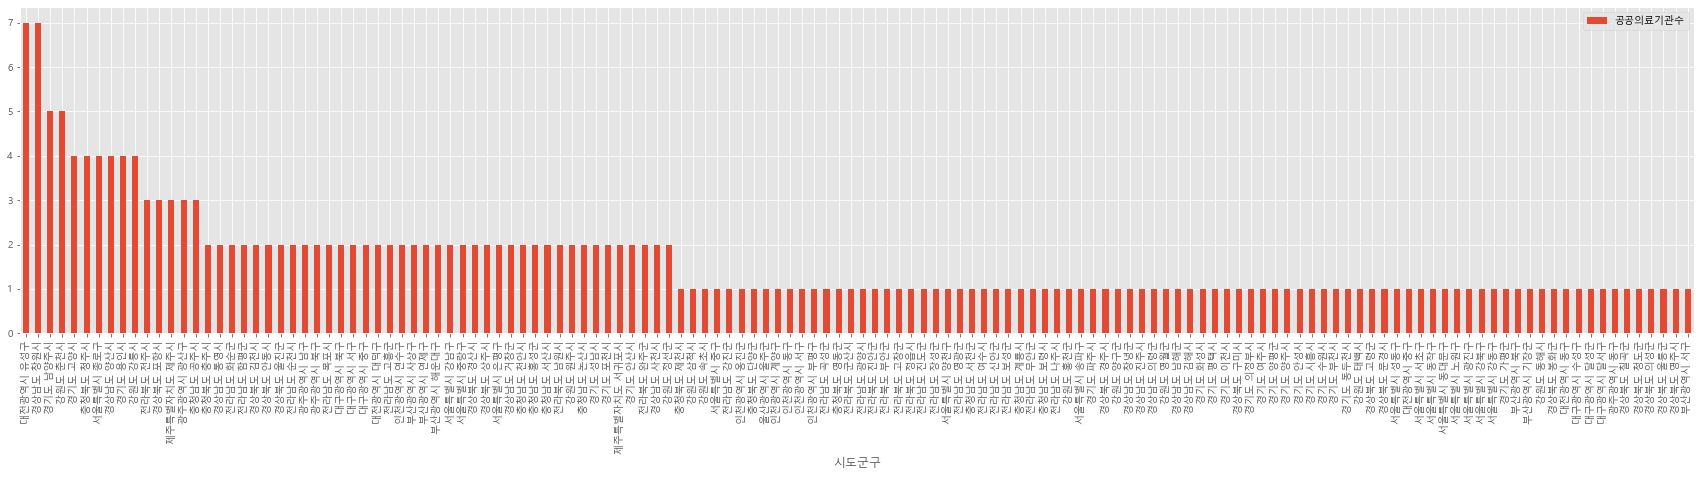

In [59]:
import matplotlib.pyplot as plt
import platform

# 한글 글꼴
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')

# 그래프 그리기

# 지역별 공공의료기관수
mc_ratio = local_medicalcenter_population[['공공의료기관수']]
mc_ratio = mc_ratio.sort_values('공공의료기관수', ascending=False)
                                                # 내림차순 정렬
plt.style.use('ggplot')
mc_ratio.plot(kind='bar', rot=90, figsize=(30, 6))

<AxesSubplot:xlabel='시도군구'>

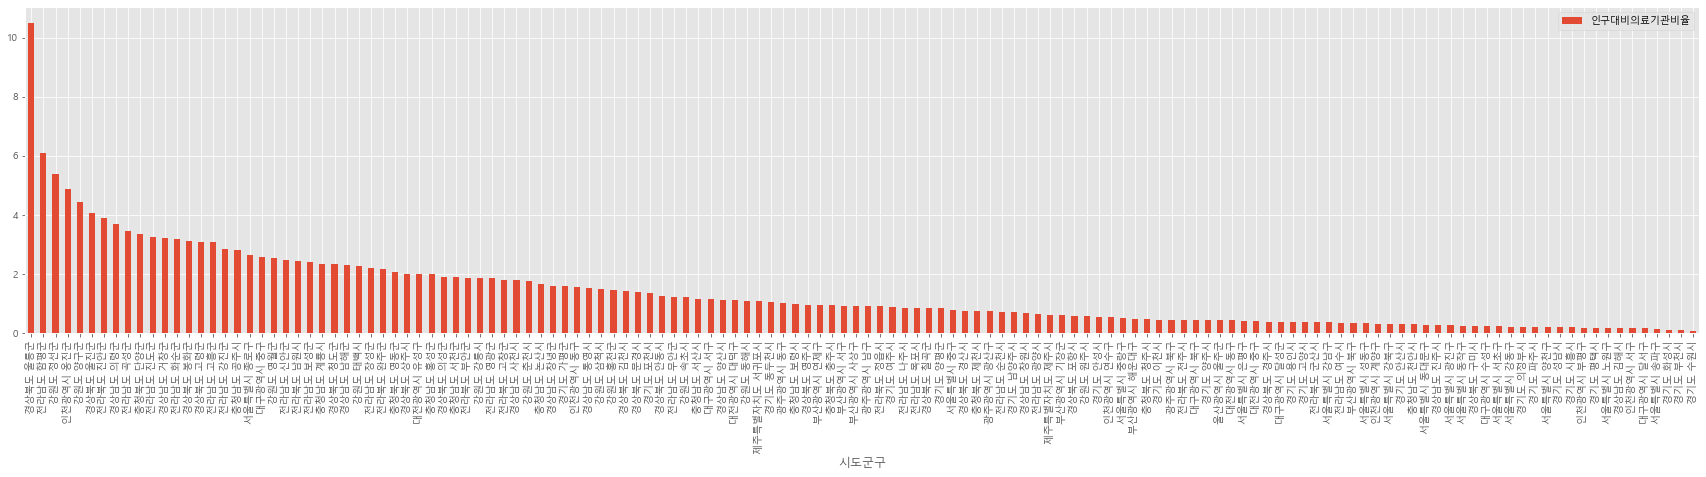

In [62]:
# 인구대비 공공의료기관 비율
population_mc_rate = local_medicalcenter_population[['인구대비의료기관비율']]
population_mc_rate = population_mc_rate.sort_values('인구대비의료기관비율',ascending=False)

plt.style.use('ggplot')
population_mc_rate.plot(kind='bar', rot=90, figsize=(30, 6))